# Counting Rings on Fish Otoliths (Ear Stones)


`-- Leo Lonzarich, 4 April 2023 // [Revised 4-4-23] --`


### Table of Contents
- [Importing photo](#import)

### Motivations:
- Can we automate the counting of otolith rings and expedite fish age estimations?

### General Comments:
- This notebook is purely exploratory, and will be used to develop a lightweight package that is both deployable via command line (terminal) and straightforward to use.



---
#### TODO

- Build deployable command line tool.

In [4]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from PIL import Image

## Importing and Preparing image <a class="anchor" id="import"></a>
---

Cleaning up an otolith image so rings are more readily readable during analysis.


In [5]:
def greyscale(arr):
    # Accepted formula of Timothy Sauer for RGB to greyscale conversion.
    # Sets 0 to black. 
    grey = np.zeros((arr.shape[0], arr.shape[1]))
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            grey[i,j] = 0.2126*arr[i,j,0] + 0.7152*arr[i,j,1] + 0.0722*arr[i,j,2]
            
    return np.uint8(grey)

In [6]:
# Convert to RGB since the alpha channel is not needed.
image = Image.open('otolith.png').convert('RGB')
data = np.asarray(image)

bw_image = greyscale(data)

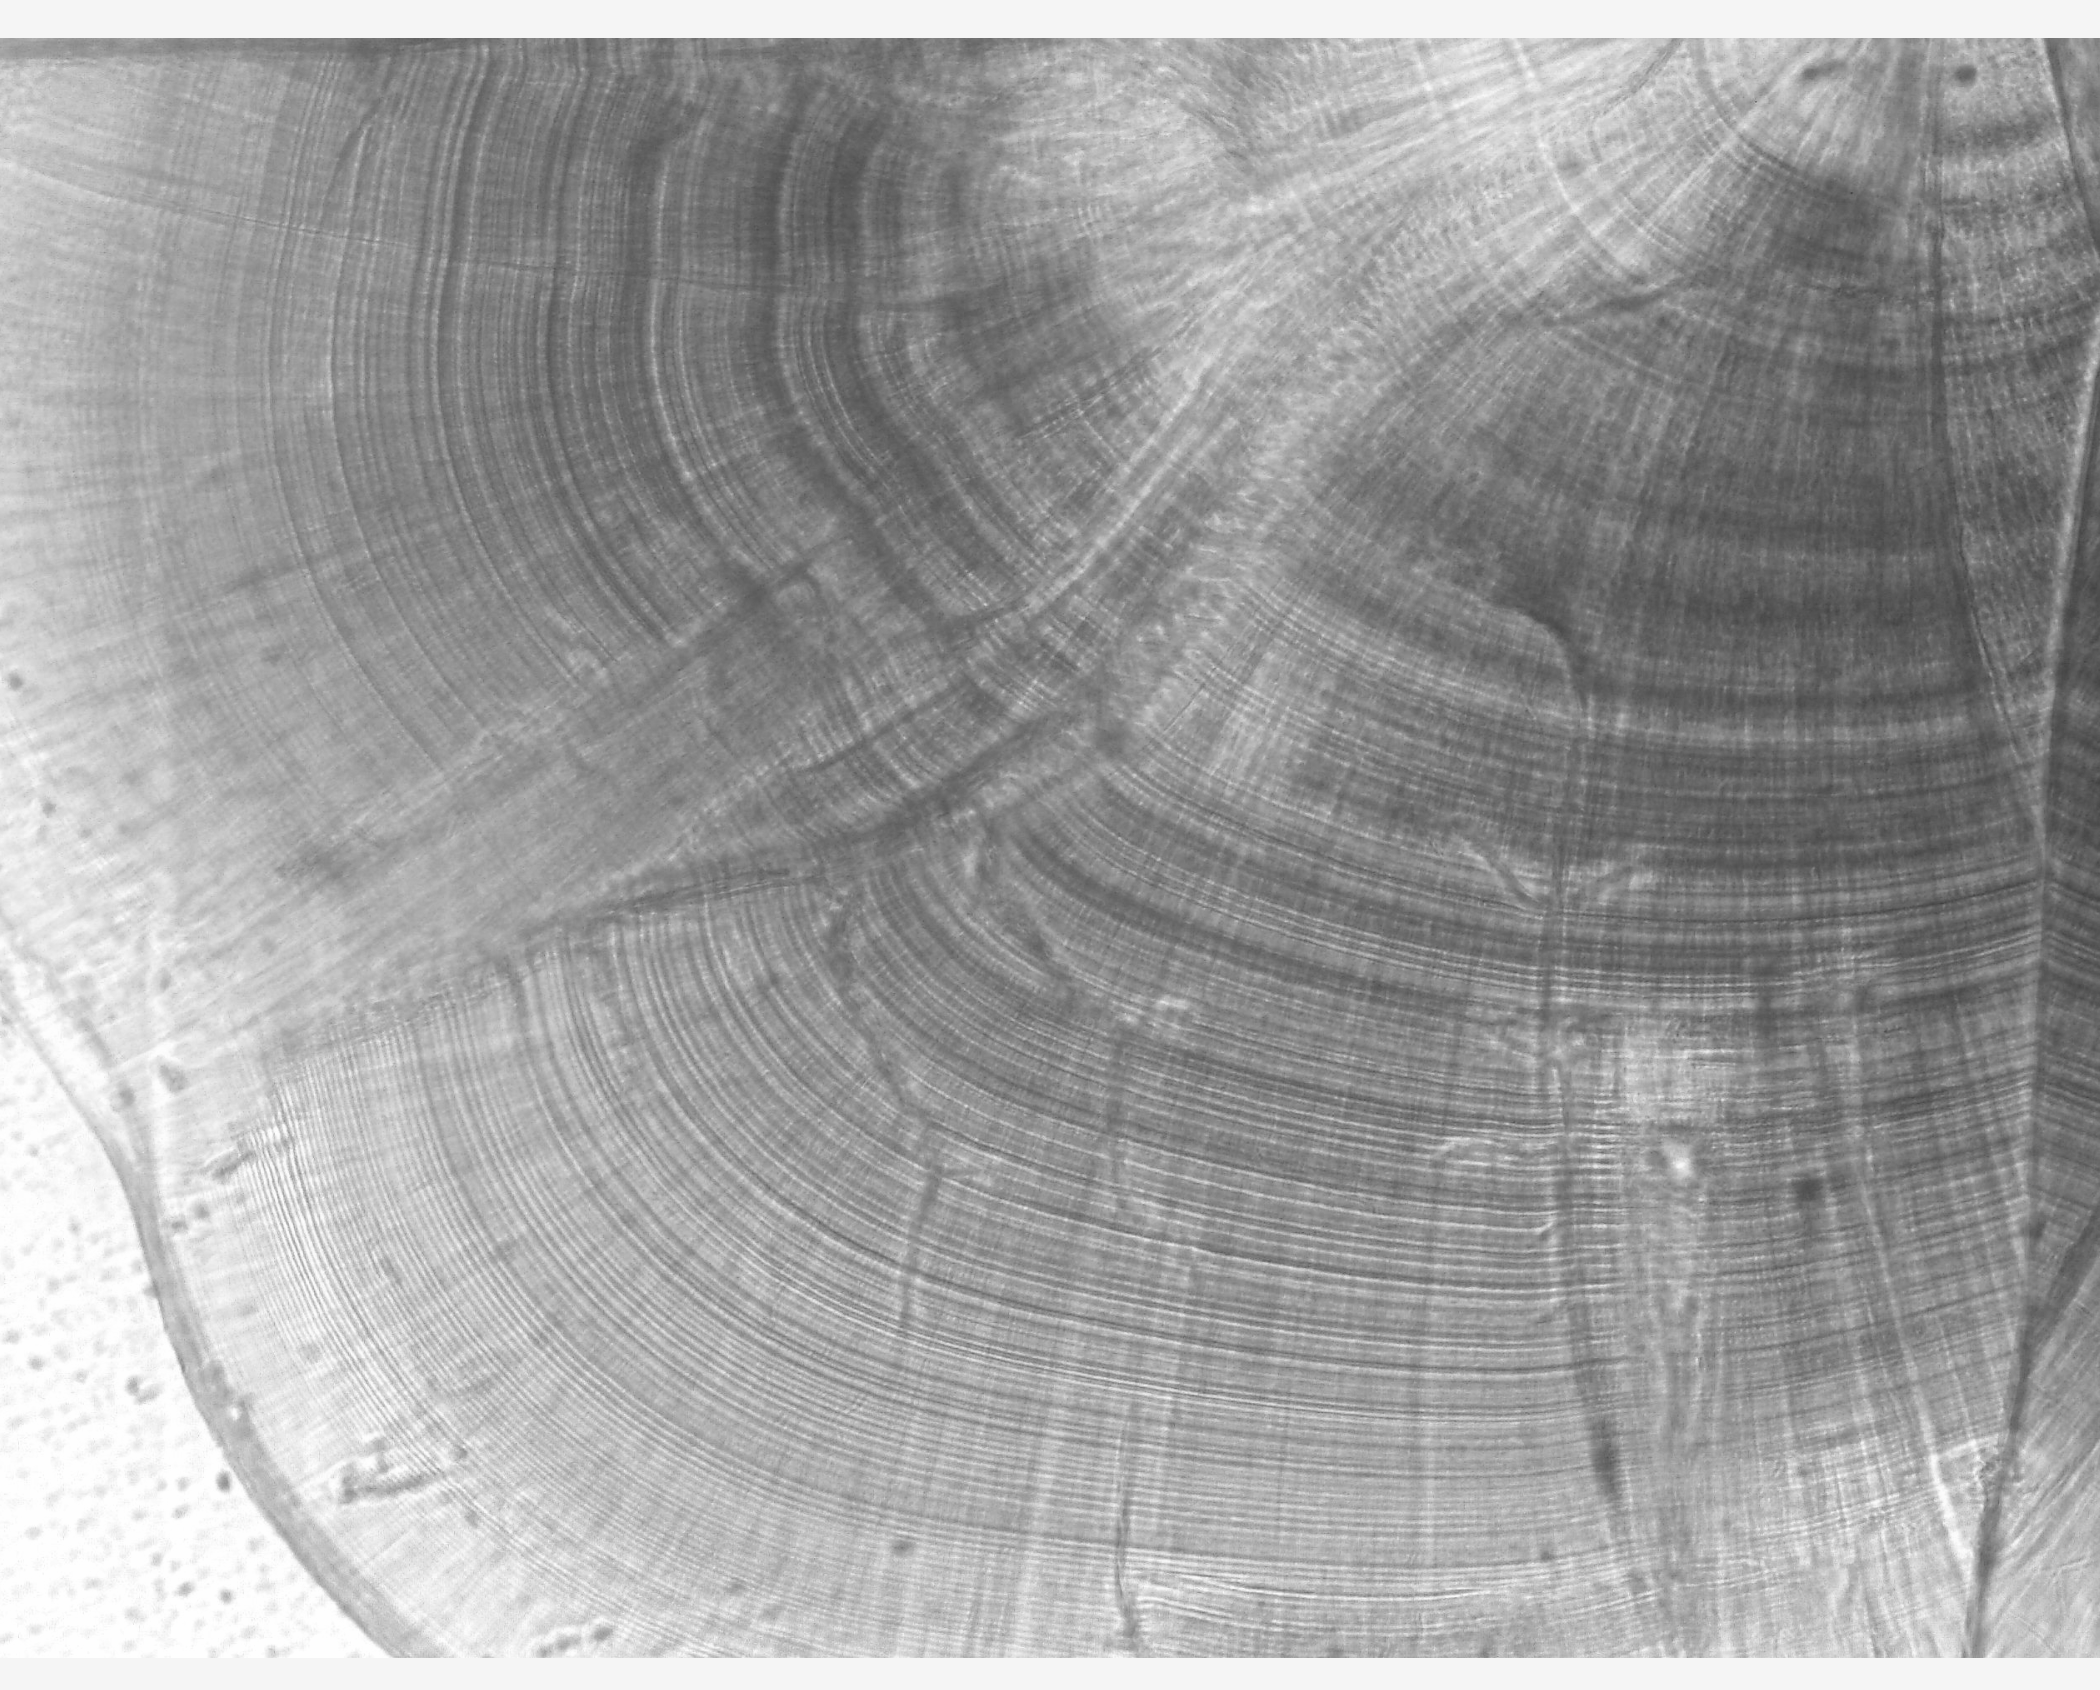

In [7]:
Image.fromarray(bw_image)

Text(0.5, 1.0, 'Fourier transform')

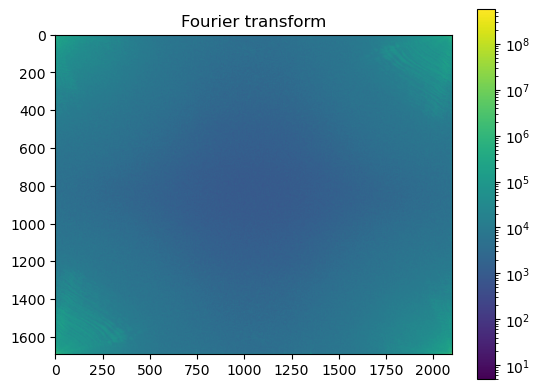

In [11]:
from scipy import fftpack
im_fft = fftpack.fft2(bw_image)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Filtered Spectrum')

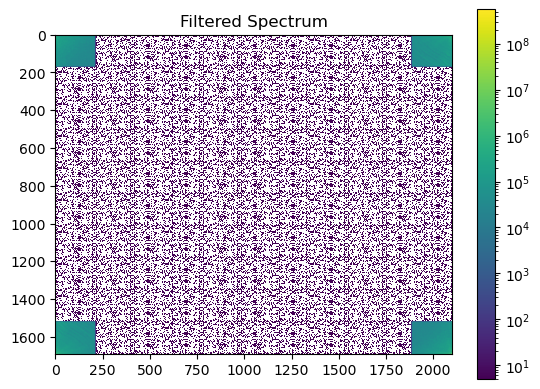

In [12]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

Text(0.5, 1.0, 'Reconstructed Image')

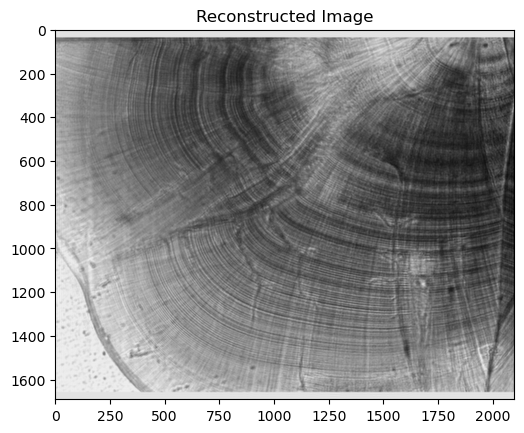

In [13]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [21]:
plt.imsave('TestReconstruction.png', im_new, dpi=1000)

In [18]:
im_new

array([[245.39449843, 245.28445411, 245.2105831 , ..., 245.7466937 ,
        245.65180766, 245.52516643],
       [245.95148625, 245.65581037, 245.46327017, ..., 246.88833293,
        246.63353767, 246.2996586 ],
       [246.17225715, 245.80521294, 245.56846235, ..., 247.33092451,
        247.01519719, 246.60333366],
       ...,
       [243.95284985, 244.33203102, 244.58009348, ..., 242.76244961,
        243.08730458, 243.50990071],
       [244.17373857, 244.48119972, 244.67973663, ..., 243.20876094,
        243.47302014, 243.814772  ],
       [244.71845712, 244.83864846, 244.91393619, ..., 244.34414855,
        244.44761294, 244.5790729 ]])